#Secure Flight Log Analyzer

## 1) Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hashlib
import time

print("Setup complete")

Setup complete


## 2) Create Sample Flight Log Data

In [2]:
np.random.seed(42)

n_rows = 300 #size of dataset

df = pd.DataFrame({
    "Timestamp": pd.date_range(start="2026-01-01 08:00:00", periods=n_rows, freq="min"),
    "FlightNumber": np.random.choice(["GA100", "GA205", "GA330"], size=n_rows),
    "PilotName": np.random.choice(
        ["Alex Johnson", "Sam Lee", "Ben Anderson", "Taylor Kim"], size=n_rows
    ),

    "Altitude_ft": np.clip(np.random.normal(35000, 1200, n_rows), 0, None),
    "Speed_kts": np.clip(np.random.normal(520, 25, n_rows), 0, None),
    "EngineTemp_C": np.random.normal(780, 35, n_rows),
    "Vibration": np.abs(np.random.normal(1.2, 0.25, n_rows))

})

anomaly_indices = np.random.choice(df.index, size=8, replace=False)

df.loc[anomaly_indices, "EngineTemp_C"] += np.random.uniform(130, 220,
size=len(anomaly_indices))

df.loc[anomaly_indices, "Vibration"] += np.random.uniform(0.8, 1.5,
size=len(anomaly_indices))

df.head(10)

,Timestamp,FlightNumber,PilotName,Altitude_ft,Speed_kts,EngineTemp_C,Vibration
0,2026-01-01 08:00:00,GA330,Ben Anderson,35272.381161,564.309450,776.951190,0.792332
1,2026-01-01 08:01:00,GA100,Taylor Kim,34674.845285,510.040665,813.089346,1.242743
2,2026-01-01 08:02:00,GA330,Alex Johnson,35535.547218,526.254762,828.239618,0.595887
3,2026-01-01 08:03:00,GA330,Alex Johnson,36363.490781,540.143382,803.925501,1.066724
4,2026-01-01 08:04:00,GA100,Taylor Kim,35601.712108,461.841207,775.342967,1.606096
5,2026-01-01 08:05:00,GA100,Alex Johnson,36272.766295,557.770080,819.398757,1.281283
6,2026-01-01 08:06:00,GA330,Taylor Kim,34197.230207,473.477253,727.715963,1.244854
7,2026-01-01 08:07:00,GA205,Alex Johnson,33958.298930,544.923502,754.938036,1.655195
8,2026-01-01 08:08:00,GA330,Sam Lee,34345.954862,537.170795,894.706441,2.198644
9,2026-01-01 08:09:00,GA330,Alex Johnson,33479.141238,461.510175,778.916727,1.515455


## 3) Quick Data Checks

In [4]:
df.isna().sum()

,0
Timestamp,0
FlightNumber,0
PilotName,0
Altitude_ft,0
Speed_kts,0
EngineTemp_C,0
Vibration,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Timestamp     300 non-null    datetime64[ns]
 1   FlightNumber  300 non-null    object        
 2   PilotName     300 non-null    object        
 3   Altitude_ft   300 non-null    float64       
 4   Speed_kts     300 non-null    float64       
 5   EngineTemp_C  300 non-null    float64       
 6   Vibration     300 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 16.5+ KB


## 4) Anonymize Sensitive Data (Privacy)

In [6]:
print("Raw columns:", list(df.columns))
print("Privacy-safe columns:", list(df_priv.columns))


Raw columns: ['Timestamp', 'FlightNumber', 'PilotName', 'Altitude_ft', 'Speed_kts', 'EngineTemp_C', 'Vibration']
Privacy-safe columns: ['Timestamp', 'FlightNumber', 'Altitude_ft', 'Speed_kts', 'EngineTemp_C', 'Vibration', 'PilotID']


In [5]:
def hash_identifier(value: str) -> str:
  return hashlib.sha256(value.encode("utf-8")).hexdigest()

df_priv = df.copy()
df_priv["PilotID"] = df_priv["PilotName"].apply(hash_identifier)

# Remove real name column
df_priv = df_priv.drop(columns=["PilotName"])

df_priv.head(10)

,Timestamp,FlightNumber,Altitude_ft,Speed_kts,EngineTemp_C,Vibration,PilotID
0,2026-01-01 08:00:00,GA330,35272.381161,564.309450,776.951190,0.792332,7025a238dd74f231fa565a750dc242541871f26d6e8852...
1,2026-01-01 08:01:00,GA100,34674.845285,510.040665,813.089346,1.242743,0bf03cfc666920115032f180fd26b1add03bdc98083883...
2,2026-01-01 08:02:00,GA330,35535.547218,526.254762,828.239618,0.595887,03a930920935ef71ee506df0a24db0dced0ec16180f711...
3,2026-01-01 08:03:00,GA330,36363.490781,540.143382,803.925501,1.066724,03a930920935ef71ee506df0a24db0dced0ec16180f711...
4,2026-01-01 08:04:00,GA100,35601.712108,461.841207,775.342967,1.606096,0bf03cfc666920115032f180fd26b1add03bdc98083883...
5,2026-01-01 08:05:00,GA100,36272.766295,557.770080,819.398757,1.281283,03a930920935ef71ee506df0a24db0dced0ec16180f711...
6,2026-01-01 08:06:00,GA330,34197.230207,473.477253,727.715963,1.244854,0bf03cfc666920115032f180fd26b1add03bdc98083883...
7,2026-01-01 08:07:00,GA205,33958.298930,544.923502,754.938036,1.655195,03a930920935ef71ee506df0a24db0dced0ec16180f711...
8,2026-01-01 08:08:00,GA330,34345.954862,537.170795,894.706441,2.198644,e6f90a7ffeb3806c39e9b19912dd827fabc2c468167efa...
9,2026-01-01 08:09:00,GA330,33479.141238,461.510175,778.916727,1.515455,03a930920935ef71ee506df0a24db0dced0ec16180f711...


## 5) Detect Anomalies

In [10]:
def zscore(series: pd.Series) -> pd.Series:
  return (series - series.mean()) / series.std(ddof=0)

df_priv["Temp_z"] = zscore(df_priv["EngineTemp_C"])
df_priv["Vib_z"] = zscore(df_priv["Vibration"])

Z_THRESHOLD = 3.0

df_priv["Alert_Z"] = (df_priv["Temp_z"].abs() > Z_THRESHOLD) | (df_priv["Vib_z"].abs() >
Z_THRESHOLD)

alerts_z = df_priv[df_priv["Alert_Z"]].copy()

alerts_z[["Timestamp", "FlightNumber", "EngineTemp_C", "Vibration", "Temp_z",
"Vib_z"]].head(20)

,Timestamp,FlightNumber,EngineTemp_C,Vibration,Temp_z,Vib_z
8,2026-01-01 08:08:00,GA330,894.706441,2.198644,2.316711,3.195608
17,2026-01-01 08:17:00,GA205,953.114540,2.265419,3.586726,3.410378
78,2026-01-01 09:18:00,GA330,934.012034,1.661561,3.171364,1.468169
152,2026-01-01 10:32:00,GA330,938.241605,2.576562,3.263331,4.411120
265,2026-01-01 12:25:00,GA205,966.154028,2.284465,3.870254,3.471636
267,2026-01-01 12:27:00,GA330,1012.502357,2.442950,4.878044,3.981378
276,2026-01-01 12:36:00,GA330,1019.903670,2.095043,5.038977,2.862392
286,2026-01-01 12:46:00,GA100,953.450386,2.651056,3.594028,4.650715


In [7]:
TEMP_THRESHOLD = 900
VIB_THRESHOLD = 2.2

df_priv["Alert_Temp"] = df_priv["EngineTemp_C"] > TEMP_THRESHOLD
df_priv["Alert_Vib"] = df_priv["Vibration"] > VIB_THRESHOLD
df_priv["Alert_Any"] = df_priv["Alert_Temp"] | df_priv["Alert_Vib"]

alerts_rule = df_priv[df_priv["Alert_Any"]].copy()

alerts_rule[["Timestamp", "FlightNumber", "EngineTemp_C", "Vibration", "Alert_Temp",
"Alert_Vib"]].head(20)

,Timestamp,FlightNumber,EngineTemp_C,Vibration,Alert_Temp,Alert_Vib
17,2026-01-01 08:17:00,GA205,953.114540,2.265419,True,True
78,2026-01-01 09:18:00,GA330,934.012034,1.661561,True,False
152,2026-01-01 10:32:00,GA330,938.241605,2.576562,True,True
265,2026-01-01 12:25:00,GA205,966.154028,2.284465,True,True
267,2026-01-01 12:27:00,GA330,1012.502357,2.442950,True,True
276,2026-01-01 12:36:00,GA330,1019.903670,2.095043,True,False
286,2026-01-01 12:46:00,GA100,953.450386,2.651056,True,True


## 6) Visualize Results

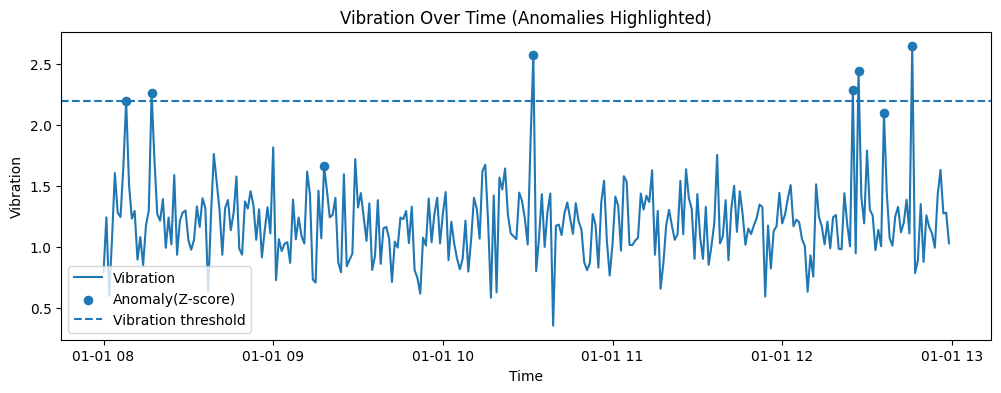

In [12]:
plt.figure(figsize=(12,4))
plt.plot(df_priv["Timestamp"], df_priv["Vibration"], label="Vibration")
plt.scatter(alerts_z["Timestamp"], alerts_z["Vibration"], label="Anomaly(Z-score)", s=35)
plt.axhline(VIB_THRESHOLD, linestyle="--", label="Vibration threshold")
plt.title("Vibration Over Time (Anomalies Highlighted)")
plt.xlabel("Time")
plt.ylabel("Vibration")
plt.legend()
plt.show()

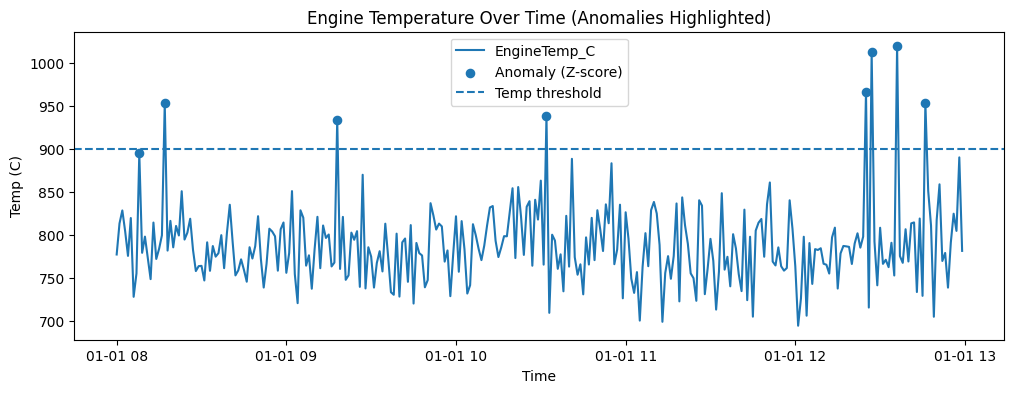

In [11]:
plt.figure(figsize=(12,4))
plt.plot(df_priv["Timestamp"], df_priv["EngineTemp_C"], label="EngineTemp_C")
plt.scatter(alerts_z["Timestamp"], alerts_z["EngineTemp_C"], label="Anomaly (Z-score)",
s=35)

plt.axhline(TEMP_THRESHOLD, linestyle="--", label="Temp threshold")
plt.title("Engine Temperature Over Time (Anomalies Highlighted)")
plt.xlabel("Time")
plt.ylabel("Temp (C)")
plt.legend()
plt.show()


## 7) Simulated Real-Time Monitoring

In [16]:
def realtime_monitor(df_stream: pd.DataFrame, sleep_s: float = 0.02):
  print("Starting simulated real-time monitoring...\n")
  for _, row in df_stream.iterrows():
    if row["Alert_Z"]:
      print(
          f"ALERT! | {row['Timestamp']} | Flight={row['FlightNumber']} | "
          f"Temp={row['EngineTemp_C']:.1f}C | Vib={row['Vibration']:.2f}"
      )

    time.sleep(sleep_s)

  print("\nMonitoring finished")

realtime_monitor(df_priv, sleep_s=0.01)


Starting simulated real-time monitoring...

ALERT! | 2026-01-01 08:08:00 | Flight=GA330 | Temp=894.7C | Vib=2.20
ALERT! | 2026-01-01 08:17:00 | Flight=GA205 | Temp=953.1C | Vib=2.27
ALERT! | 2026-01-01 09:18:00 | Flight=GA330 | Temp=934.0C | Vib=1.66
ALERT! | 2026-01-01 10:32:00 | Flight=GA330 | Temp=938.2C | Vib=2.58
ALERT! | 2026-01-01 12:25:00 | Flight=GA205 | Temp=966.2C | Vib=2.28
ALERT! | 2026-01-01 12:27:00 | Flight=GA330 | Temp=1012.5C | Vib=2.44
ALERT! | 2026-01-01 12:36:00 | Flight=GA330 | Temp=1019.9C | Vib=2.10
ALERT! | 2026-01-01 12:46:00 | Flight=GA100 | Temp=953.5C | Vib=2.65

Monitoring finished


## 8) Export Files

In [17]:
df_priv.to_csv("anonymized_flight_logs.csv", index=False)
alerts_z.to_csv("alerts_detected.csv", index=False)

print("Saved anonymized_flight_logs.csv and alerts_detected.csv")

Saved anonymized_flight_logs.csv and alerts_detected.csv
